In [1]:
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *

plt.style.use('ggplot')


g_folder = 'res_exploration_v1'
g_reg = StepperRegistry()

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
featd=prepare_klines(start_date='2025-01-01',
                   end_date='2026-01-01',
                   tokens=['ETHUSDT'],
                   folder=g_folder,
                   name=None,
                   r=g_reg
                   )

2025-03-26 19:32:07 - Missing key=window_volume_wgt in cfg for kmeans_sret -- will use default value
2025-03-26 19:32:07 - prepare_klines start_date=2025-01-01 end_date=2026-01-01
2025-03-26 19:32:07 - Reading data from DuckDB
2025-03-26 19:32:07 - Stepper creating instance res_exploration_v1 None_cnt_exists
2025-03-26 19:32:10 - Stepper creating instance res_exploration_v1 None_close_diff1
2025-03-26 19:32:10 - Stepper creating instance res_exploration_v1 None_tret_clip
2025-03-26 19:32:11 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200
2025-03-26 19:32:11 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200_qtl
2025-03-26 19:32:12 - Stepper creating instance res_exploration_v1 None_tret_csmeanNonewgt
2025-03-26 19:32:13 - Stepper creating instance res_exploration_v1 None_tret_xmkt_raw_clip


In [3]:

featd, feats_log = perform_log(featd,
                                feats=['tret'],
                                folder=g_folder,
                                name=None,
                                r=g_reg)
featd, feats_px = perform_cumsum(featd,
                                    feats=feats_log,
                                    folder=g_folder,
                                    name=None,
                                    r=g_reg)
featd,feats_sm = perform_ewm(featd,
                             feats=feats_px,
                             windows=[100],
                                    folder=g_folder,
                                    name=None,
                                    r=g_reg 
                                    )

featd,nfeats=perform_pfp(featd, 
                         feats=feats_sm,
                         nbrevs=[3], 
                         ticks=[100*1e-4], 
                         debug=False, 
                         folder=g_folder, 
                         name=None,
                         r=g_reg)



2025-03-26 19:32:13 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum
2025-03-26 19:32:13 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100
2025-03-26 19:32:13 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3
2025-03-26 19:32:20 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff
2025-03-26 19:32:20 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm50
2025-03-26 19:32:20 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm100
2025-03-26 19:32:20 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm500
2025-03-26 19:32:20 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm1000


In [4]:
perf_col = [x for x in featd.keys() if x.endswith('perf')][-1]
dir_col = [x for x in featd.keys() if x.endswith('dir')][-1]
px_col=feats_sm[0]
print(perf_col)
print(dir_col)

tret_log1_cumsum_ewm100_pfp0.01x3_perf
tret_log1_cumsum_ewm100_pfp0.01x3_dir


In [5]:
df=pd.DataFrame(featd)
df=df.set_index('close_time')
df=df.sort_index()


<Axes: title={'center': 'PFP example'}, xlabel='close_time'>

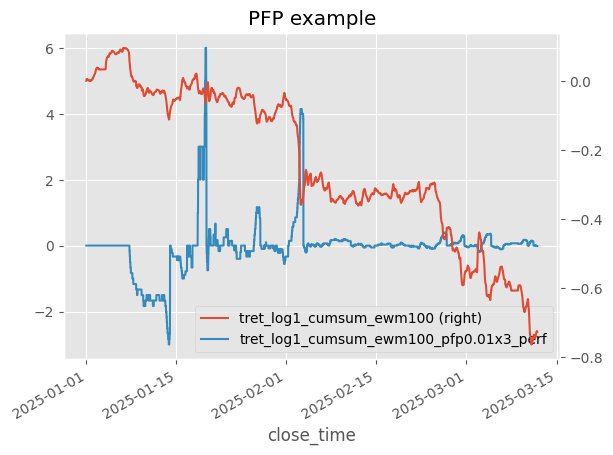

In [6]:
df[[px_col,perf_col]]\
    .plot(secondary_y=px_col,title='PFP example')

<Axes: title={'center': 'PFP example'}, xlabel='close_time'>

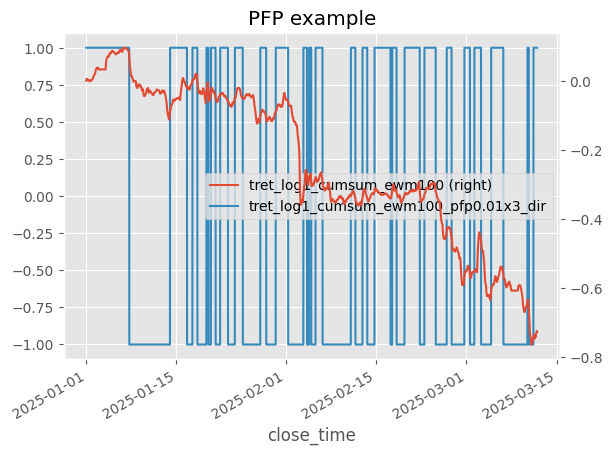

In [7]:
df[[px_col,dir_col]]\
    .plot(secondary_y=px_col,title='PFP example')

In [8]:
pd.Series(featd.keys()).sort_values()

2                                                 close
11                                          close_diff1
0                                            close_time
1                                                dscode
5                                            dscode_str
6                                                  dtsi
8                                                   one
9                                           sigf_ipocnt
10                                       sigf_timeofday
19                                             sigf_wgt
4                                      taker_buy_volume
12                                                 tret
15                                         tret_clipqtl
25                                            tret_log1
26                                     tret_log1_cumsum
27                              tret_log1_cumsum_ewm100
28                tret_log1_cumsum_ewm100_pfp0.01x3_dir
32            tret_log1_cumsum_ewm100_pfp0.01x3_